# Bayes' Rule

$$P(A|B) = \frac{P(B|A)\cdot P(A)}{P(B)}$$

$$\text{Posterior} = \frac{\text{Likelihood } \cdot \text{ Prior}}{\text{Evidence}}$$

## Back to the COVID example

In this example, we have a prior belief about our chances of having COVID, $COVID^+$. We also know the sensitivity and specificity of the test we are taking, .8 and 1.0 respectively. These represent our true positive and true negative rate and will be crucial in helping us identify our posterior. To make Bayes' Rule applicable to our situation, let's change some of the symbols. Let $x$ represent the result we get on our test, either $+$ or $-$.

$$ P(COVID^+|x) = \frac{P(x|COVID^+) \cdot P(COVID^+)}{P(x)} $$

Now we have an equation that will help us to find our posterior no matter the value we observe for $x$, but before we can use it, we still have to determine the value for the likelihood function and the evidence. This is where we go back to the sensitivity and specificity of the test, and we can find all the probabilities $P(x|COVID)$ by assuming for a moment that we either have COVID-19 or that we don't have COVID-19.

Assuming we do have COVID, $P(x|COVID^+)$:
$$\text{True Positive Rate: }P(+|COVID^+) = 0.8 \text{  Sensitivity/Precision}$$
$$\text{False Negative Rate: }P(-|COVID^+) = 0.2$$
Assuming we do not have COVID, $P(x|COVID^-)$:
$$\text{False Positive Rate: }P(+|COVID^-) = 0.0$$
$$\text{True Negative Rate: }P(-|COVID^-) = 1.0 \text{  Specificity/Recall}$$

Now we almost have everything we need to start. The last thing is the probability of $x$, $P(x)$. Because we don't know if we have COVID or not, $P(x)$ actually depends on our prior. It is either $P(x|COVID^+)$ or $P(x|COVID^-)$, so we estimate the probability in this situation (which is easily done, luckily, because it is a binary situation) by multiplying these two probabilities by our priors.

$$ P(x) = P(x|COVID^+) \cdot P(COVID^+) + P(x|COVID^-) \cdot P(COVID^-) $$

### Now we can finish our example.

This time around we will assume that our true state of nature is $COVID^-$. This is nicer for us because there are no false positives in this situation. If we were $COVID^+$, then once we got a positive test result, there would be no more uncertainty. For us (the authors), it will be nice for us to see how the uncertainty of our hypothetical selves will decay.

In [33]:
# Define our priors and conditional probabilities
# We have to assume that our state of nature is COVID-
prior = .5
posCpos = .8
negCpos = .2
posCneg = .0
negCneg = 1.

In [34]:
posteriors = []
posteriors.append(prior)
for i in range(10):
    x = 0 # A negative test result; in other situations, this might be a random variable
    if x == 0:
        # chance of a negative result given a positive state * chance of a positive state + chance of a negative result ...
        px = negCpos * prior + negCneg * (1-prior)
        # posterior = likelihood * prior / evidence
        prior = negCpos * prior / px
    elif x == 1: # If a positive test result
        # chance of a positive result given a positive state * chance of a positive state + chance of a positive result ...
        px = posCpos * prior + posCneg * (1-prior)
        # posterior = likelihood * prior / evidence
        prior = posCpos * prior / px
    posteriors.append(prior)

In [35]:
posteriors

[0.5,
 0.16666666666666669,
 0.03846153846153847,
 0.00793650793650794,
 0.0015974440894568696,
 0.0003198976327575177,
 6.399590426212724e-05,
 1.2799836162097128e-05,
 2.559993446416778e-06,
 5.119997378561345e-07,
 1.0239998951424113e-07]

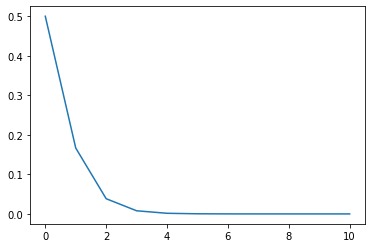

In [36]:
import matplotlib.pyplot as plt
plt.plot(posteriors)
plt.show()

## Thompson Sampling

For Thompson Sampling, we have to be able to apply this to continuous distributions instead of just binary problems. And just to make it easier on ourselves, we will modify Bayes' Rule to be a proportion instead of an equality.

$$ \text{Posterior } \propto \text{ Likelihood } \cdot \text{ Prior} $$

We can do this because our evidence $P(x)$ is a constant.

For this topic, we will also be modeling a Multi-Armed Bandit problem. Herbert Robbins and others intellectualized the problem of playing slot machines. Some have different probabilities of paying out and different amounts that pay out when you win. How do you discover most quickly which slot machine is best to play on?

So let's play on some slot machines. We will be simulating a Multi-Armed Bandit problem using a Bernoulli Thompson Sampler. Beta distributions are parameterized by $\alpha$ and $\beta$ and their probability density function is $f(\mu; \alpha, \beta) \propto \mu^{\alpha-1} \cdot (1-\mu)^{\beta-1}$ Betas are super easy to update when we are using a binomial likelihood function (only two outcomes - success and failure). It looks like this: $L(\mu) = \mu^y \cdot (1-\mu)^{n-y}$. Put them together and our posterior becomes:

\begin{align}
f(\mu;\alpha,\beta|x) &\propto (\mu^x \cdot (1-\mu)^{1-x}) \cdot \mu^{\alpha-1} \cdot (1-\mu)^{\beta-1} \\
f(\mu;\alpha,\beta|x) &\propto \mu^{\alpha-1+x} \cdot (1-\mu)^{\beta-x} \\
f(\mu;\alpha,\beta|x) &\propto f(\mu;\alpha+x,\beta+1-x)
\end{align}

In short, if we have a success (a payout), we add one to $\alpha$. If we have a failure (the machine "robs" us of our money), we add one to $\beta$.

Let's say in this case that we have two slot machines. Machine 1 pays out \\$40 when we win. Machine 2 pays out \\$60 when we win. However, we do not know the average frequencies ($\mu_1, \mu_2$) with which they pay out. We are left to guess (to form our priors) at what these frequencies might be.

In [37]:
from scipy.stats import beta

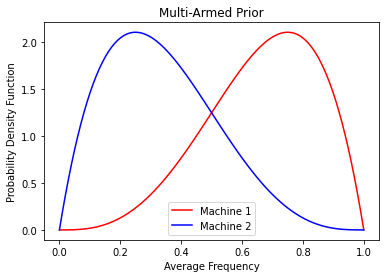

In [38]:
mu = np.linspace(0,1,100)
p1 = beta.pdf(mu,4,2)
p2 = beta.pdf(mu,2,4)
plt.plot(mu, p1, c='red')
plt.plot(mu, p2, c='blue')
plt.title('Multi-Armed Prior')
plt.ylabel('Probability Density Function')
plt.xlabel('Average Frequency')
plt.legend(['Machine 1','Machine 2'])
plt.show()

The priors used here are beta priors which (when using a binomial likelihood function as in this one) have really simple rules for updating (finding the posterior). Notice that these priors indicate we believe that Machine 1 (which pays less) pays out more frequently than Machine 2. This is to represent the possibility of believing the casino has made the average payout per game roughly equal throughout the establishment. (But really I just wanted to show the shape of two different beta distributions.)

The dilemma presented here is that we want to explore the possibility that one of these machines pays out more than the other on average, but we also do not want to rule one or the other out too quickly. This is called the explore-exploit dilemma. Thompson Sampling is an incredibly effective and quick method of learning the optimal strategies in a static environment. (Also note that there are ways to add the uncertainty of random walk drift to this problem which I know you would be interested in, Matt.)

To perform a Thompson Sampling, we simply have to pick randomly from our priors two average frequencies, one from each prior. Let's say we sample our priors (using a random number generator) and get .8 for Machine 1 and .2 for Machine 2. We always want to play the slot machine that we guess gives us the most payout so we'll multiply these average frequencies by the size of the payout and get \\$32 for Machine 1 and \\$12 for Machine 2 and we will pull Machine 1's lever.

Though this may be the more likely outcome, it does not eliminate the possibility of sampling, say, a .6 frequency for Machine 1 and a .5 frequency for Machine 2. In this case, we estimate an average payout of \\$24 for Machine 1 and \\$30 for Machine 2. In this somewhat more rare case, we will still play Machine 2. The beauty of Thompson Sampling is that we essentially leave all of the exploitation up to chance and simply update the probability distributions that we draw from.

In [52]:
payout1 = 40
payout2 = 60
beta1 = [4,2]
beta2 = [2,4]

machine1 = .5
machine2 = .3

pulls = []
payouts = []

for _ in range(100):
    mu1 = beta.rvs(*beta1)
    mu2 = beta.rvs(*beta2)
    e1 = mu1*payout1
    e2 = mu2*payout2
    if e1 > e2:
        # Play Machine 1
        success = np.random.choice([1,0],p=[machine1, 1-machine1])
        payout = payout1*success
        if success:
            beta1[0] += 1
        else:
            beta1[1] += 1
        pulls.append(1)
    else:
        # Play Machine 2
        success = np.random.choice([1,0],p=[machine2, 1-machine2])
        payout = payout2*success
        if success:
            beta2[0] += 1
        else:
            beta2[1] += 1
        pulls.append(2)
    payouts.append(payout)

In [54]:
beta1

[39, 43]

In [55]:
beta2

[6, 24]

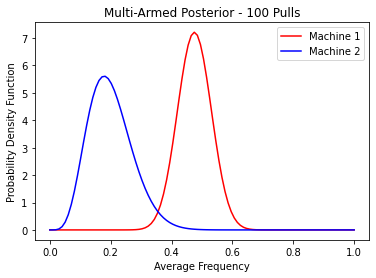

In [56]:
mu = np.linspace(0,1,100)
p1 = beta.pdf(mu,*beta1)
p2 = beta.pdf(mu,*beta2)
plt.plot(mu, p1, c='red')
plt.plot(mu, p2, c='blue')
plt.title('Multi-Armed Posterior - 100 Pulls')
plt.ylabel('Probability Density Function')
plt.xlabel('Average Frequency')
plt.legend(['Machine 1','Machine 2'])
plt.show()

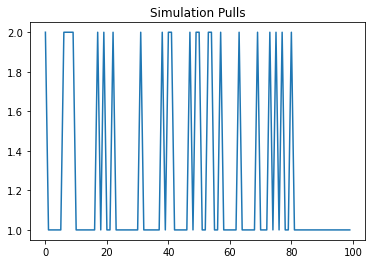

In [57]:
plt.plot(pulls)
plt.title('Simulation Pulls')
plt.show()

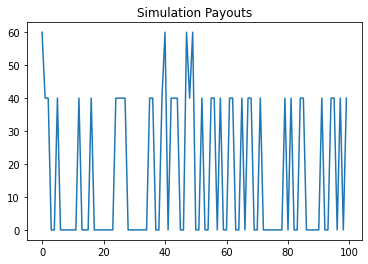

In [58]:
plt.plot(payouts)
plt.title('Simulation Payouts')
plt.show()